## Step 1: Importing Libraries and Loading Data

In [1]:
import numpy as np
import numpy.linalg as mat
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.datasets import get_rdataset
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.anova import anova_lm

In [2]:
## Loading the Auto MPG dataset
data = sns.load_dataset('mpg')

## Extracting the first few rows
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Step 2: Data Preprocessing

In [3]:
## Dropping rows with missing values
data = data.dropna()
data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
## Label Encoding of the 3 categorical variables

## Initializing the LabelEncoder
label_encoder = LabelEncoder()

## Label encoding the 'cylinders' column
data['cylinders'] = label_encoder.fit_transform(data['cylinders'])

## Label encoding the 'model_year' column
data['model year'] = label_encoder.fit_transform(data['model_year'])

## Label encoding the 'origin' column
data['origin'] = label_encoder.fit_transform(data['origin'])

## Displaying the first few rows of the dataset to check the transformations
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,model year
0,18.0,4,307.0,130.0,3504,12.0,70,2,chevrolet chevelle malibu,0
1,15.0,4,350.0,165.0,3693,11.5,70,2,buick skylark 320,0
2,18.0,4,318.0,150.0,3436,11.0,70,2,plymouth satellite,0
3,16.0,4,304.0,150.0,3433,12.0,70,2,amc rebel sst,0
4,17.0,4,302.0,140.0,3449,10.5,70,2,ford torino,0


In [5]:
## Separating the regressors and target variables
X = data.drop(['mpg', 'name'], axis = 1)
y = data['mpg']
print(X.shape)
print(y.shape)
X

(392, 8)
(392,)


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,model year
0,4,307.0,130.0,3504,12.0,70,2,0
1,4,350.0,165.0,3693,11.5,70,2,0
2,4,318.0,150.0,3436,11.0,70,2,0
3,4,304.0,150.0,3433,12.0,70,2,0
4,4,302.0,140.0,3449,10.5,70,2,0
...,...,...,...,...,...,...,...,...
393,1,140.0,86.0,2790,15.6,82,2,12
394,1,97.0,52.0,2130,24.6,82,0,12
395,1,135.0,84.0,2295,11.6,82,2,12
396,1,120.0,79.0,2625,18.6,82,2,12


In [6]:
## Adding a constant(bias term) to the model (intercept term)
X_matrix = sm.add_constant(X)
X_matrix.head()

,const,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,model year
0,1.0,4,307.0,130.0,3504,12.0,70,2,0
1,1.0,4,350.0,165.0,3693,11.5,70,2,0
2,1.0,4,318.0,150.0,3436,11.0,70,2,0
3,1.0,4,304.0,150.0,3433,12.0,70,2,0
4,1.0,4,302.0,140.0,3449,10.5,70,2,0


## Step 3: Fitting the Multiple Linear Regression Model using statsmodel.api

In [7]:
## Fitting the model
model = sm.OLS(y, X_matrix).fit()

## Summary of the model
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     256.6
Date:                Fri, 10 Jan 2025   Prob (F-statistic):          1.55e-140
Time:                        12:56:05   Log-Likelihood:                -1020.8
No. Observations:                 392   AIC:                             2058.
Df Residuals:                     384   BIC:                             2089.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0045      0.001      3.650   

## Step 4: Estimation of Parameters

In [8]:
## Estimating the bias and 6 regression coefficients
coefficients = model.params
print("Estimated value for Bias:", coefficients[0])

print("Estimated value for regression coefficients:")
for i in range(1, len(coefficients)):
    print(X.columns[i-1], ":", coefficients.iloc[i])

Estimated value for Bias: 0.00445732019423998
Estimated value for regression coefficients:
cylinders : -1.2069206014892473
displacement : 0.028665897763533694
horsepower : -0.017577079701974134
weight : -0.0068003403378125715
acceleration : 0.07584939284497841
model_year : 0.5514077349629798
origin : -1.299588457068226
model year : 0.23939532136619146


In [9]:
## Estimating the error variance
residuals = model.resid
error_variance = np.var(residuals)
print("Estimated Error Variance:", error_variance)

Estimated Error Variance: 10.702397975698265


## Step 5: Confidence Intervals for Parameters

In [10]:
conf_int = model.conf_int()
print("Confidence Intervals:", conf_int)

Confidence Intervals:                      0         1
const         0.002056  0.006858
cylinders    -1.922025 -0.491816
displacement  0.014397  0.042935
horsepower   -0.044470  0.009316
weight       -0.008079 -0.005522
acceleration -0.117058  0.268757
model_year    0.495200  0.607616
origin       -1.855584 -0.743592
model year    0.112584  0.366207


## Step 6: Testing the Significance of Partial Regression Coefficients

In [11]:
## p-values for coefficients
print("p-values:", model.pvalues)

p-values: const           2.984991e-04
cylinders       9.918404e-04
displacement    9.297067e-05
horsepower      1.995419e-01
weight          1.076521e-22
acceleration    4.399532e-01
model_year      1.876354e-58
origin          5.859371e-06
model year      2.362970e-04
dtype: float64


## Step 7: Detecting the presence of Multicollinearity using 3 different approaches below

In [12]:
## a. Correlation Matrix
correlation_matrix = X.corr()
correlation_matrix


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,model year
cylinders,1.000000,0.933614,0.803459,0.885187,-0.461222,-0.331361,0.572281,-0.331361
displacement,0.933614,1.000000,0.897257,0.932994,-0.543800,-0.369855,0.594314,-0.369855
horsepower,0.803459,0.897257,1.000000,0.864538,-0.689196,-0.416361,0.447330,-0.416361
weight,0.885187,0.932994,0.864538,1.000000,-0.416839,-0.309120,0.521609,-0.309120
acceleration,-0.461222,-0.543800,-0.689196,-0.416839,1.000000,0.290316,-0.264409,0.290316
model_year,-0.331361,-0.369855,-0.416361,-0.309120,0.290316,1.000000,-0.066892,1.000000
origin,0.572281,0.594314,0.447330,0.521609,-0.264409,-0.066892,1.000000,-0.066892
model year,-0.331361,-0.369855,-0.416361,-0.309120,0.290316,1.000000,-0.066892,1.000000


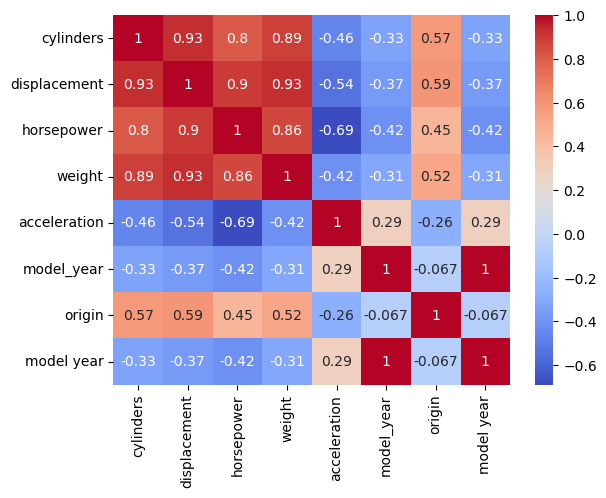

In [13]:
## Plotting the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [14]:
## b. Variance Inflation Factor

### Computing VIF using correlation matrix
C = mat.inv(X.corr())
print("VIF's of each regressors represents the diagonal elements of the inverse of the correlation_matrix:", np.diagonal(C))

VIF's of each regressors represents the diagonal elements of the inverse of the correlation_matrix: [8.38883852e+00 2.06393982e+01 9.91977549e+00 1.09158408e+01
 2.62217465e+00 9.00719925e+15 1.70597477e+00 9.00719925e+15]


In [15]:
### Computing VIF after scaling using Standardscaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
W = pd.DataFrame(X_scaled)
W_transpose_W = np.dot(np.transpose(W), W)/len(X)
W_transpose_W


array([[ 1.        ,  0.93361358,  0.80345896,  0.88518666, -0.46122204,
        -0.33136101,  0.57228105, -0.33136101],
       [ 0.93361358,  1.        ,  0.897257  ,  0.9329944 , -0.5438005 ,
        -0.36985521,  0.59431378, -0.36985521],
       [ 0.80345896,  0.897257  ,  1.        ,  0.86453774, -0.68919551,
        -0.41636148,  0.44733042, -0.41636148],
       [ 0.88518666,  0.9329944 ,  0.86453774,  1.        , -0.4168392 ,
        -0.30911988,  0.52160938, -0.30911988],
       [-0.46122204, -0.5438005 , -0.68919551, -0.4168392 ,  1.        ,
         0.29031611, -0.26440895,  0.29031611],
       [-0.33136101, -0.36985521, -0.41636148, -0.30911988,  0.29031611,
         1.        , -0.0668918 ,  1.        ],
       [ 0.57228105,  0.59431378,  0.44733042,  0.52160938, -0.26440895,
        -0.0668918 ,  1.        , -0.0668918 ],
       [-0.33136101, -0.36985521, -0.41636148, -0.30911988,  0.29031611,
         1.        , -0.0668918 ,  1.        ]])

In [16]:
print("VIF's are the diagonal elements of the inverse of W_transpose_W:", np.diagonal(mat.inv(W_transpose_W)))

VIF's are the diagonal elements of the inverse of W_transpose_W: [8.38883852e+00 2.06393982e+01 9.91977549e+00 1.09158408e+01
 2.62217465e+00 2.98831441e+15 1.70597477e+00 2.98831441e+15]


In [17]:
## c. Condition Number
A = np.dot(np.transpose(X), X)
eigan_values, eigan_vectors = mat.eig(A)
Cond_num = max(eigan_values)/min(eigan_values)
print("Condition Number is:", Cond_num)

Condition Number is: 45854159.36346115


## Step 8: Determining the Condition Indices

In [18]:
print("The Condition Indices are:", np.round(max(eigan_values)/eigan_values))

The Condition Indices are: [1.0000000e+00 2.7940000e+03 2.9236000e+04 5.4168000e+04 1.0331620e+06
 3.9877590e+06 4.5854159e+07 2.7658849e+07]


## Step 9: Model Adequacy using R-Squared and Adjusted R-Squared

In [19]:
r_squared = model.rsquared
adj_r_squared = model.rsquared_adj
print("R-squared:", r_squared)
print("Adjusted R-squared:", adj_r_squared)

R-squared: 0.8238657728394113
Adjusted R-squared: 0.8206549926567964
